Kelompok : 

1.  Affi Nizar Suksmawati (20/466390/PPA/05956) 
2.  Affifah Mutiara Pertiwi (20/466391/PPA/05957)
3.  Axl Adilla  (20/466397/PPA/05963)
4.  Bagaskoro Saputro (20/466398/PPA/05964)

---

### Import Dataset

In [ ]:
!wget 'https://raw.githubusercontent.com/AxlAdilla/GA-Covid19-Prediction/main/50DataKawalCovid.csv'

--2021-04-06 15:12:44--  https://raw.githubusercontent.com/AxlAdilla/GA-Covid19-Prediction/main/50DataKawalCovid.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 556 [text/plain]
Saving to: ‘50DataKawalCovid.csv’

50DataKawalCovid.cs 100%[===================>]     556  --.-KB/s    in 0s      

2021-04-06 15:12:45 (21.0 MB/s) - ‘50DataKawalCovid.csv’ saved [556/556]



### Import Library

In [ ]:
import pandas as pd
import numpy as np
import random
import math
import copy
import matplotlib.pyplot as plt

In [ ]:
raw = pd.read_csv('50DataKawalCovid.csv')
raw.head()

,date,total_case
0,2-Mar,2
1,3-Mar,2
2,4-Mar,2
3,5-Mar,2
4,6-Mar,4


### Preprocessing Data 

In [ ]:
slidingWindow = 5

dataset = []
numOfData = len(raw) - (slidingWindow-1)
for i in range(numOfData):
  rowData = []
  for j in range(slidingWindow):
    rowData.append(raw.total_case[j + i])
  dataset.append(rowData)

dataset = np.array(dataset)
dataset[:5]

array([[ 2,  2,  2,  2,  4],
       [ 2,  2,  2,  4,  4],
       [ 2,  2,  4,  4,  6],
       [ 2,  4,  4,  6, 19],
       [ 4,  4,  6, 19, 27]])

In [ ]:
dataset_x = dataset[:,:4]
dataset_x[:5]

array([[ 2,  2,  2,  2],
       [ 2,  2,  2,  4],
       [ 2,  2,  4,  4],
       [ 2,  4,  4,  6],
       [ 4,  4,  6, 19]])

In [ ]:
dataset_y = dataset[:,4]
dataset_y[:5]

array([ 4,  4,  6, 19, 27])

---


### Source Code

####Random Gen


In [ ]:
def random_generasi(): #Random Generasi Pertama
  populasi = []
  for i in range(numOfPopulasi):
    individu = []
    for j in range(genPerIndividu):
      gen = random.random() * random.choice([-1 ,1]) * 10**random.randint(0,3)
      individu.append(round(gen, 2))
    populasi.append(individu)

  return populasi
  #populasi [[0.9, a, a,a,a], [b,b,b,b,b]]

In [ ]:
def hitung_y_pred(individu):
  arr_y_pred = []
  for data_x in dataset_x:
    y_pred = 0
    for key, gen in enumerate(individu[:-1]):
      y_pred += gen * data_x[key]
    y_pred += individu[-1]
    arr_y_pred.append(y_pred)

  return arr_y_pred

In [ ]:
def hitung_fitness(individu_pred):
  diff = []
  for index in range(len(dataset_y)):
    diff.append(abs((individu_pred[index] - dataset_y[index])/individu_pred[index]))
  cost = sum(diff) / len(diff)

  return 1/(cost + 0.01)

####Evaluasi Fitness

In [ ]:
def evaluasi_fitness(populasi): #Hitung Fitness
  fitness_individu = []
  for individu in populasi:
    individu_pred = hitung_y_pred(individu)
    fitness_individu.append(hitung_fitness(individu_pred))

  return fitness_individu
#[0.1, 0.2, 0.3]

#### Roullete wheel

In [ ]:
def roulletewheel(populasi, hasil_eval, pc): #selection method
# pilihPasangan(populasi, hasil_eval, pc)
  probability_populasi = []
  total_fitness = sum(hasil_eval)
  min = 0
  for fitness in hasil_eval:
    probability = fitness/total_fitness * 100 #perhitungan nilai probabilitas
    max = min + probability                   #range min dan max kumulatif probabilitas
    node = [probability, min, max]
    min = max
    probability_populasi.append(node)

  return pilihPasangan(populasi, hasil_eval, pc, probability_populasi)
 #[[0, 3], [5, 1]]

In [ ]:
def pilihPasangan(populasi, hasil_eval, pc, probability_populasi):
  # jumlah individu terpilih
  selected_individu = int(round(len(populasi) * pc ))

  # bilangan random untuk setiap individu
  bil = []
  for i in range(selected_individu):
    bil.append(random.randint(0, 100))

  # mencari range individu terpilih dari bilangan random yang dibangkitkan kumulatif / min max
  list_of_parent = []
  for i in range(selected_individu):
    for key,probability in enumerate(probability_populasi):
      if (probability[1] > bil[i] and probability[2] >= bil[i]):
        list_of_parent.append(key)
        break

  # memilih pasangan dari list individu terpilih secara random
  pasangan = []

  # misal jumlah individu yang terpilih ganjil
  if selected_individu % 2 == 1:
    for i in range(round((selected_individu+1)/2)):
      pairs = []
      pairs.append(random.choice(list_of_parent))
      pairs.append(random.choice(list_of_parent))
      pasangan.append(pairs)

  # misal jumlah individu yang terpilih genap
  elif selected_individu % 2 == 0:
    for i in range(round(selected_individu/2)):
      pairs = []
      pairs.append(random.choice(list_of_parent))
      pairs.append(random.choice(list_of_parent))
      pasangan.append(pairs)

  # mengcopy hasil individu terpilih untuk individu yang nilainya sama misal [9.9] 
  # salah satu individunya di hapus, biar nggak merubah master selected_individunya
  individu = copy.deepcopy(list_of_parent)

  # misal ada hasil pasangan yang nilainya sama [9,9]
  for i in range(len(pasangan)):
    if pasangan[i][0] == pasangan[i][1]:
      a = pasangan[i][0]
      try :
        individu.remove(a)
      except:
        pass
      pasangan[i][1] = random.choice(individu)
      
  return pasangan

In [ ]:
def arithcross(pasangan, populasi):
  # mencari lokasi gen yang di crossover
  gen_location = round(len(populasi[1])/2)

  # membangkitkan nilai random
  alfa = round(random.random(),1)

  # membagi pasangan [7,8] yang 7 ditaruh di offspring1, 8 ditaruh di offspring2
  offspring1 = []
  offspring2 = []
  for i in range(len(pasangan)):
    offspring1.append(populasi[pasangan[i][0]])
    offspring2.append(populasi[pasangan[i][1]])

  # crossover dg arithcross
  for i in range(len(pasangan)):
    offspring1[i][gen_location] = round(((alfa*offspring1[i][gen_location])+((1-alfa)*offspring2[i][gen_location])), 2)
    offspring2[i][gen_location] = round(((alfa*offspring2[i][gen_location])+((1-alfa)*offspring1[i][gen_location])), 2)
  
  # menggabungkan nilai offspring1, offspring2, sesuai urutan crossover
  offspring = []
  for i in range(len(offspring1)):
    offspring.append(offspring1[i])
    offspring.append(offspring2[i])
  return offspring

####Simple Aritmetic Crossover

In [ ]:
def simple_arithcross(pasangan, populasi):
  # mencari lokasi gen yang di crossover
  gen_location =  int(round(len(populasi[0])/2))

  # membangkitkan nilai random
  alfa = round(random.random(),1)

  # membagi pasangan [7,8] yang 7 ditaruh di offspring1, 8 ditaruh di offspring2
  offspring1 = []
  offspring2 = []
  for i in range(0, len(pasangan)):
    offspring1.append(populasi[pasangan[i][0]])
    offspring2.append(populasi[pasangan[i][1]])

  # crossover dg arithcross
  for i in range(len(pasangan)):
    for j in range(gen_location, len(offspring1[i])):
      offspring1[i][j] = round(((alfa*offspring1[i][j])+((1-alfa)*offspring2[i][j])), 2)
      offspring2[i][j] = round(((alfa*offspring2[i][j])+((1-alfa)*offspring1[i][j])), 2)
  
  # menggabungkan nilai offspring1, offspring2, sesuai urutan crossover
  offspring = []
  for i in range(len(offspring1)):
    offspring.append(offspring1[i])
    offspring.append(offspring2[i])
  return offspring

####Single Aritmetic Crossover

In [ ]:
def single_arithcross(pasangan, populasi):
  # mencari lokasi gen yang di crossover
  gen_location =  int(round(len(populasi[0])/2))

  # membangkitkan nilai random
  alfa = round(random.random(),1)

  # membagi pasangan [7,8] yang 7 ditaruh di offspring1, 8 ditaruh di offspring2
  offspring1 = []
  offspring2 = []
  for i in range(0, len(pasangan)):
    offspring1.append(populasi[pasangan[i][0]])
    offspring2.append(populasi[pasangan[i][1]])

  # crossover dg arithcross
  for i in range(len(pasangan)):
    offspring1[i][gen_location] = round(((alfa*offspring1[i][gen_location])+((1-alfa)*offspring2[i][gen_location])), 2)
    offspring2[i][gen_location] = round(((alfa*offspring2[i][gen_location])+((1-alfa)*offspring1[i][gen_location])), 2)
  
  # menggabungkan nilai offspring1, offspring2, sesuai urutan crossover
  offspring = []
  for i in range(len(offspring1)):
    offspring.append(offspring1[i])
    offspring.append(offspring2[i])
  return offspring

#### One Point Crossover

In [ ]:
def one_point_crossover(pasangan, populasi): #crossover method
  randomNodeSwitched = random.randint(0,genPerIndividu-1)
  offsprings = []
  for pair in pasangan:
    offspring_1 = copy.deepcopy(populasi[pair[0]])
    offspring_2 = copy.deepcopy(populasi[pair[1]])

    offspring_1[randomNodeSwitched] = populasi[pair[1]][randomNodeSwitched]
    offspring_2[randomNodeSwitched] = populasi[pair[0]][randomNodeSwitched]

    offsprings.append(offspring_1)
    offsprings.append(offspring_2)
  return offsprings

#### Mutation

In [ ]:
def mutation(offspring, pm): #mutation method
  totalGen = len(offspring) * genPerIndividu  # menghitung jumlah seluruh gen dalam offspring yang akan dimutasi
  jmlGenTermutasi = int(round(pm * totalGen)) # menghitung jumlah gen yang akan bermutasi dengan probabilitas sejumlah pm

  for index in range(jmlGenTermutasi):
    genTermutasi = random.randint(0, totalGen-1)       # merandom indeks untuk gen terpilih
    indexOffspring = int(genTermutasi/genPerIndividu)  # menentukan offspring terpilih
    nodeOffspring = genTermutasi % genPerIndividu      # menentukan gen terpilih

    offspring[indexOffspring][nodeOffspring] = random.random() * random.choice([-1 ,1]) * 10**random.randint(0,3)
    # memutasikan gen terpilih

  return offspring
  #offspring semua setelah mutasi
  #[[1,2,3,10,5], [x,y,z,v,w]]

#### Elitism Selection

In [ ]:
def elitism(hasil_eval_anak, hasil_eval):
  individu = populasi + offspring                         # mengumpulkan individu lama dan baru
  df = pd.DataFrame(individu)
  fitness = hasil_eval + hasil_eval_anak                  # mengumpulkan fitness tiap individu
  df['fitness'] = fitness
  ordered_df = df.sort_values('fitness', ascending=False) # menyatukan fitness dan individu
  best_fitness = ordered_df.fitness[0]                    # mengurutkan individu berdasarkan fitness terbaik
  return (ordered_df.drop(columns='fitness').values.tolist()[:numOfPopulasi], best_fitness)
  # mengembalikan individu terpilih dengan nilai fitnessnya

####Program Utama

In [ ]:
numOfPopulasi = 100
generasi = 200
probability_crossover = 0.6
probability_mutation = 0.05
genPerIndividu = slidingWindow

In [ ]:
best_fitness = []
populasi = random_generasi()

for curr_gen in range(generasi):
  hasil_eval = evaluasi_fitness(populasi)
  pasangan = roulletewheel(populasi, hasil_eval, probability_crossover)

  offspring = one_point_crossover(pasangan, populasi)
  #offspring = single_arithcross(pasangan, populasi)
  #offspring = simple_arithcross(pasangan, populasi)

  offspring = mutation(offspring, probability_mutation)
  hasil_eval_anak = evaluasi_fitness(offspring)
  populasi, curr_best_fitness = elitism(hasil_eval_anak, hasil_eval)
  best_fitness.append(curr_best_fitness)

####Individu Terbaik

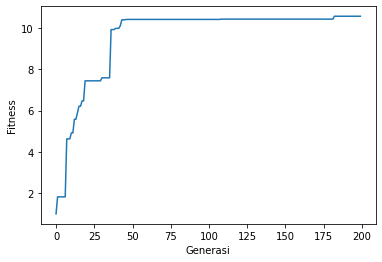

In [ ]:
plt.plot(best_fitness)
plt.xlabel('Generasi')
plt.ylabel('Fitness')
plt.show()

In [ ]:
best_fitness[generasi-1]

10.565760341595876

In [ ]:
populasi[0]

[-0.5499015389667198,
 0.22000524345447403,
 0.4944001432502322,
 0.87,
 8.864113578747851]

####Error dengan MAPE

In [ ]:
best_individu_pred = hitung_y_pred(populasi[0])

In [ ]:
diff = []
for index in range(len(dataset_y)):
  diff.append(abs((best_individu_pred[index] - dataset_y[index])/best_individu_pred[index]))

mape = sum(diff) / len(diff)
mape

0.08464534190342593

#### Prediksi vs Aktual

In [ ]:
newDf = pd.DataFrame(best_individu_pred)
newDf['y_target'] = dataset_y
newDf

,0,y_target
0,10.933121,4
1,12.673121,4
2,13.661922,6
3,15.841932,19
4,27.040929,27
5,40.868142,34
6,52.673608,69
7,81.195731,96
8,119.130560,117
9,154.600237,134


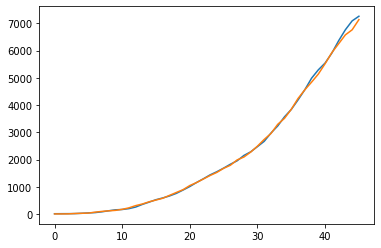

In [ ]:
plt.plot(best_individu_pred)
plt.plot(dataset_y)
plt.show()

#### Prediksi hari ke 51 dan 52

In [ ]:
A = populasi[0][0]
B = populasi[0][1]
C = populasi[0][2]
D = populasi[0][3]
E = populasi[0][4]

prediksi_51 = A*dataset_x[-1][0] + B*dataset_x[-1][1] + C*dataset_x[-1][2] + D*dataset_x[-1][3] + E
prediksi_51

prediksi_52 = A*dataset_x[-1][1] + B*dataset_x[-1][2] + C*dataset_x[-1][3] + D*prediksi_51 + E
prediksi_52



7676.454513289264

In [ ]:
print("Prediksi hari ke 51 dan 52 berturut - turut adalah", round(prediksi_51), "dan", round(prediksi_52))

Prediksi hari ke 51 dan 52 berturut - turut adalah 7258 dan 7676
